In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('../Data Sets/John/school_scores.csv', encoding='latin-1')
df.head()

,Year,State.Code,State.Name,Total.Math,Total.Test-takers,Total.Verbal,Academic Subjects.Arts/Music.Average GPA,Academic Subjects.Arts/Music.Average Years,Academic Subjects.English.Average GPA,Academic Subjects.English.Average Years,...,Score Ranges.Between 600 to 700.Math.Total,Score Ranges.Between 600 to 700.Verbal.Females,Score Ranges.Between 600 to 700.Verbal.Males,Score Ranges.Between 600 to 700.Verbal.Total,Score Ranges.Between 700 to 800.Math.Females,Score Ranges.Between 700 to 800.Math.Males,Score Ranges.Between 700 to 800.Math.Total,Score Ranges.Between 700 to 800.Verbal.Females,Score Ranges.Between 700 to 800.Verbal.Males,Score Ranges.Between 700 to 800.Verbal.Total
0,2005,AL,Alabama,559,3985,567,3.92,2.2,3.53,3.9,...,1096,596,613,1209,156,292,448,219,250,469
1,2005,AK,Alaska,519,3996,523,3.76,1.9,3.35,3.9,...,787,423,375,798,47,116,163,109,115,224
2,2005,AZ,Arizona,530,18184,526,3.85,2.1,3.45,3.9,...,3814,1831,1679,3510,327,630,957,412,501,913
3,2005,AR,Arkansas,552,1600,563,3.90,2.2,3.61,4.0,...,443,242,226,468,49,83,132,77,93,170
4,2005,CA,California,522,186552,504,3.76,1.8,3.32,3.8,...,37605,16078,14966,31044,5451,8792,14243,5011,4766,9777


In [3]:
df.columns

Index(['Year', 'State.Code', 'State.Name', 'Total.Math', 'Total.Test-takers',
       'Total.Verbal', 'Academic Subjects.Arts/Music.Average GPA',
       'Academic Subjects.Arts/Music.Average Years',
       'Academic Subjects.English.Average GPA',
       'Academic Subjects.English.Average Years',
       'Academic Subjects.Foreign Languages.Average GPA',
       'Academic Subjects.Foreign Languages.Average Years',
       'Academic Subjects.Mathematics.Average GPA',
       'Academic Subjects.Mathematics.Average Years',
       'Academic Subjects.Natural Sciences.Average GPA',
       'Academic Subjects.Natural Sciences.Average Years',
       'Academic Subjects.Social Sciences/History.Average GPA',
       'Academic Subjects.Social Sciences/History.Average Years',
       'Family Income.Between 20-40k.Math',
       'Family Income.Between 20-40k.Test-takers',
       'Family Income.Between 20-40k.Verbal',
       'Family Income.Between 40-60k.Math',
       'Family Income.Between 40-60k.Test-takers'

In [5]:
income_cols= ['Family Income.Between 20-40k.Math',
       'Family Income.Between 20-40k.Test-takers',
       'Family Income.Between 20-40k.Verbal',
       'Family Income.Between 40-60k.Math',
       'Family Income.Between 40-60k.Test-takers',
       'Family Income.Between 40-60k.Verbal',
       'Family Income.Between 60-80k.Math',
       'Family Income.Between 60-80k.Test-takers',
       'Family Income.Between 60-80k.Verbal',
       'Family Income.Between 80-100k.Math',
       'Family Income.Between 80-100k.Test-takers',
       'Family Income.Between 80-100k.Verbal',
       'Family Income.Less than 20k.Math',
       'Family Income.Less than 20k.Test-takers',
       'Family Income.Less than 20k.Verbal',
       'Family Income.More than 100k.Math',
       'Family Income.More than 100k.Test-takers',
       'Family Income.More than 100k.Verbal']

In [9]:
df[income_cols].info

<bound method DataFrame.info of      Family Income.Between 20-40k.Math  \
0                                  513   
1                                  492   
2                                  498   
3                                  513   
4                                  477   
..                                 ...   
572                                469   
573                                483   
574                                468   
575                                551   
576                                533   

     Family Income.Between 20-40k.Test-takers  \
0                                         324   
1                                         401   
2                                        2121   
3                                         180   
4                                       26161   
..                                        ...   
572                                      4906   
573                                      3689   
574                   

# First thing to try: For a given state, make box-plots for SAT scores for each year

In [47]:
dfRI = df.loc[df['State.Code'] == 'RI']
dfRI.head()

,Year,State.Code,State.Name,Total.Math,Total.Test-takers,Total.Verbal,Academic Subjects.Arts/Music.Average GPA,Academic Subjects.Arts/Music.Average Years,Academic Subjects.English.Average GPA,Academic Subjects.English.Average Years,...,Score Ranges.Between 600 to 700.Math.Total,Score Ranges.Between 600 to 700.Verbal.Females,Score Ranges.Between 600 to 700.Verbal.Males,Score Ranges.Between 600 to 700.Verbal.Total,Score Ranges.Between 700 to 800.Math.Females,Score Ranges.Between 700 to 800.Math.Males,Score Ranges.Between 700 to 800.Math.Total,Score Ranges.Between 700 to 800.Verbal.Females,Score Ranges.Between 700 to 800.Verbal.Males,Score Ranges.Between 700 to 800.Verbal.Total
40,2005,RI,Rhode Island,505,8200,503,3.67,2.0,3.18,3.9,...,1462,718,617,1335,109,221,330,165,197,362
92,2006,RI,Rhode Island,503,8130,496,3.68,2.0,3.19,3.9,...,1282,673,604,1277,117,242,359,157,133,290
144,2007,RI,Rhode Island,499,8256,497,3.69,2.0,3.20,3.9,...,1271,645,595,1241,119,223,342,158,164,322
197,2008,RI,Rhode Island,499,8485,496,3.67,2.1,3.22,3.9,...,1318,690,645,1335,112,237,349,144,162,306
249,2009,RI,Rhode Island,498,8293,498,3.70,2.3,3.26,3.9,...,5039,2867,2264,5131,710,986,1696,855,782,1637


In [49]:
dfRI.shape

(11, 99)

In [21]:
scores_cols = ['Year', 'Score Ranges.Between 200 to 300.Math.Males',
       'Score Ranges.Between 200 to 300.Math.Total',
       'Score Ranges.Between 200 to 300.Verbal.Females',
       'Score Ranges.Between 200 to 300.Verbal.Males',
       'Score Ranges.Between 200 to 300.Verbal.Total',
       'Score Ranges.Between 300 to 400.Math.Females',
       'Score Ranges.Between 300 to 400.Math.Males',
       'Score Ranges.Between 300 to 400.Math.Total',
       'Score Ranges.Between 300 to 400.Verbal.Females',
       'Score Ranges.Between 300 to 400.Verbal.Males',
       'Score Ranges.Between 300 to 400.Verbal.Total',
       'Score Ranges.Between 400 to 500.Math.Females',
       'Score Ranges.Between 400 to 500.Math.Males',
       'Score Ranges.Between 400 to 500.Math.Total',
       'Score Ranges.Between 400 to 500.Verbal.Females',
       'Score Ranges.Between 400 to 500.Verbal.Males',
       'Score Ranges.Between 400 to 500.Verbal.Total',
       'Score Ranges.Between 500 to 600.Math.Females',
       'Score Ranges.Between 500 to 600.Math.Males',
       'Score Ranges.Between 500 to 600.Math.Total',
       'Score Ranges.Between 500 to 600.Verbal.Females',
       'Score Ranges.Between 500 to 600.Verbal.Males',
       'Score Ranges.Between 500 to 600.Verbal.Total',
       'Score Ranges.Between 600 to 700.Math.Females',
       'Score Ranges.Between 600 to 700.Math.Males',
       'Score Ranges.Between 600 to 700.Math.Total',
       'Score Ranges.Between 600 to 700.Verbal.Females',
       'Score Ranges.Between 600 to 700.Verbal.Males',
       'Score Ranges.Between 600 to 700.Verbal.Total',
       'Score Ranges.Between 700 to 800.Math.Females',
       'Score Ranges.Between 700 to 800.Math.Males',
       'Score Ranges.Between 700 to 800.Math.Total',
       'Score Ranges.Between 700 to 800.Verbal.Females',
       'Score Ranges.Between 700 to 800.Verbal.Males',
       'Score Ranges.Between 700 to 800.Verbal.Total']

In [50]:
dfRI[scores_cols]

,Year,Score Ranges.Between 200 to 300.Math.Males,Score Ranges.Between 200 to 300.Math.Total,Score Ranges.Between 200 to 300.Verbal.Females,Score Ranges.Between 200 to 300.Verbal.Males,Score Ranges.Between 200 to 300.Verbal.Total,Score Ranges.Between 300 to 400.Math.Females,Score Ranges.Between 300 to 400.Math.Males,Score Ranges.Between 300 to 400.Math.Total,Score Ranges.Between 300 to 400.Verbal.Females,...,Score Ranges.Between 600 to 700.Math.Total,Score Ranges.Between 600 to 700.Verbal.Females,Score Ranges.Between 600 to 700.Verbal.Males,Score Ranges.Between 600 to 700.Verbal.Total,Score Ranges.Between 700 to 800.Math.Females,Score Ranges.Between 700 to 800.Math.Males,Score Ranges.Between 700 to 800.Math.Total,Score Ranges.Between 700 to 800.Verbal.Females,Score Ranges.Between 700 to 800.Verbal.Males,Score Ranges.Between 700 to 800.Verbal.Total
40,2005,85,257,154,120,274,681,395,1076,635,...,1462,718,617,1335,109,221,330,165,197,362
92,2006,89,281,168,110,278,701,439,1140,684,...,1282,673,604,1277,117,242,359,157,133,290
144,2007,113,316,147,119,274,716,445,1172,659,...,1271,645,595,1241,119,223,342,158,164,322
197,2008,102,286,171,126,298,830,430,1263,732,...,1318,690,645,1335,112,237,349,144,162,306
249,2009,467,461,40,1136,60,1141,103,1116,23,...,5039,2867,2264,5131,710,986,1696,855,782,1637
300,2010,121,340,181,132,313,798,466,1264,734,...,1293,651,578,1229,122,233,355,161,175,336
352,2011,98,287,155,122,277,833,458,1291,696,...,1284,650,612,1262,108,186,294,162,155,317
405,2012,97,309,165,125,290,829,484,1313,762,...,1276,614,571,1185,104,198,302,140,140,280
458,2013,113,290,169,148,317,818,509,1327,658,...,1109,601,530,1131,109,215,324,143,138,281
511,2014,103,260,156,130,286,708,466,1174,669,...,1245,641,604,1245,106,234,340,148,168,316


In [35]:
scores_cols_totals = [x for x in scores_cols if x[-5:] == 'Total']
scores_cols_totals.insert(0, 'Year')

In [52]:
dfRIboxplot=dfRI[scores_cols_totals]
dfRIboxplot.head()

,Year,Score Ranges.Between 200 to 300.Math.Total,Score Ranges.Between 200 to 300.Verbal.Total,Score Ranges.Between 300 to 400.Math.Total,Score Ranges.Between 300 to 400.Verbal.Total,Score Ranges.Between 400 to 500.Math.Total,Score Ranges.Between 400 to 500.Verbal.Total,Score Ranges.Between 500 to 600.Math.Total,Score Ranges.Between 500 to 600.Verbal.Total,Score Ranges.Between 600 to 700.Math.Total,Score Ranges.Between 600 to 700.Verbal.Total,Score Ranges.Between 700 to 800.Math.Total,Score Ranges.Between 700 to 800.Verbal.Total
40,2005,257,274,1076,1074,2407,2534,2668,2621,1462,1335,330,362
92,2006,281,278,1140,1229,2440,2566,2628,2490,1282,1277,359,290
144,2007,316,274,1172,1195,2649,2748,2537,2507,1271,1241,342,322
197,2008,286,298,1263,1247,2577,2718,2700,2589,1318,1335,349,306
249,2009,461,60,1116,97,487,43,1558,1525,5039,5131,1696,1637


In [53]:
dfRIboxplot.set_index('Year', inplace=True)

In [54]:
dfRIboxplot.head()

,Score Ranges.Between 200 to 300.Math.Total,Score Ranges.Between 200 to 300.Verbal.Total,Score Ranges.Between 300 to 400.Math.Total,Score Ranges.Between 300 to 400.Verbal.Total,Score Ranges.Between 400 to 500.Math.Total,Score Ranges.Between 400 to 500.Verbal.Total,Score Ranges.Between 500 to 600.Math.Total,Score Ranges.Between 500 to 600.Verbal.Total,Score Ranges.Between 600 to 700.Math.Total,Score Ranges.Between 600 to 700.Verbal.Total,Score Ranges.Between 700 to 800.Math.Total,Score Ranges.Between 700 to 800.Verbal.Total
Year,,,,,,,,,,,,
2005,257,274,1076,1074,2407,2534,2668,2621,1462,1335,330,362
2006,281,278,1140,1229,2440,2566,2628,2490,1282,1277,359,290
2007,316,274,1172,1195,2649,2748,2537,2507,1271,1241,342,322
2008,286,298,1263,1247,2577,2718,2700,2589,1318,1335,349,306
2009,461,60,1116,97,487,43,1558,1525,5039,5131,1696,1637


In [59]:
dfRIboxplot.loc[[2005], scores_cols_totals[1:]]

,Score Ranges.Between 200 to 300.Math.Total,Score Ranges.Between 200 to 300.Verbal.Total,Score Ranges.Between 300 to 400.Math.Total,Score Ranges.Between 300 to 400.Verbal.Total,Score Ranges.Between 400 to 500.Math.Total,Score Ranges.Between 400 to 500.Verbal.Total,Score Ranges.Between 500 to 600.Math.Total,Score Ranges.Between 500 to 600.Verbal.Total,Score Ranges.Between 600 to 700.Math.Total,Score Ranges.Between 600 to 700.Verbal.Total,Score Ranges.Between 700 to 800.Math.Total,Score Ranges.Between 700 to 800.Verbal.Total
Year,,,,,,,,,,,,
2005,257,274,1076,1074,2407,2534,2668,2621,1462,1335,330,362


<function matplotlib.pyplot.show(close=None, block=None)>

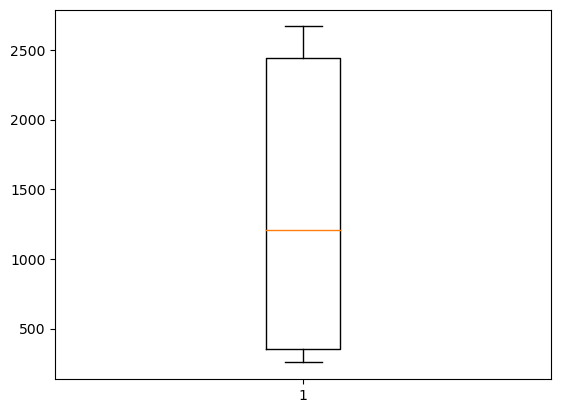

In [63]:
plt.boxplot(x=dfRIboxplot.loc[[2005], scores_cols_totals[1:]].transpose())
plt.show